In [1]:
import numpy as np

In [2]:
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [5]:
x_train = x_train /255
x_test = x_test/255

In [6]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [16]:
model = Sequential()

In [19]:
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))



In [20]:
model.add(Conv2D(64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


In [21]:
model.add(Flatten())

In [22]:
model.add(Dense(120, activation='relu'))
model.add(Dense(96, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        73792     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 64)        73792     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 32)          18464     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 32)         

In [24]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [25]:
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 567s 1s/step - loss: 0.4787 - accuracy: 0.8436 - val_loss: 0.0610 - val_accuracy: 0.9808
Epoch 2/20
469/469 [==============================] - 545s 1s/step - loss: 0.0608 - accuracy: 0.9823 - val_loss: 0.0441 - val_accuracy: 0.9870
Epoch 3/20
469/469 [==============================] - 546s 1s/step - loss: 0.0390 - accuracy: 0.9881 - val_loss: 0.0485 - val_accuracy: 0.9840
Epoch 4/20
469/469 [==============================] - 543s 1s/step - loss: 0.0312 - accuracy: 0.9906 - val_loss: 0.0382 - val_accuracy: 0.9890
Epoch 5/20
469/469 [==============================] - 564s 1s/step - loss: 0.0261 - accuracy: 0.9913 - val_loss: 0.0306 - val_accuracy: 0.9894
Epoch 6/20
469/469 [==============================] - 629s 1s/step - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.0279 - val_accuracy: 0.9911
Epoch 7/20
469/469 [==============================] - 567s 1s/step - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.0321 - val_accuracy: 0.9907

In [28]:
model.save('lenet')

INFO:tensorflow:Assets written to: lenet/assets


In [29]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 18s 59ms/step - loss: 0.0318 - accuracy: 0.9916
Test Loss: 0.03184013441205025
Test accuracy: 0.991599977016449


In [30]:
x_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [66]:
import cv2

In [120]:
p1 = cv2.imread('data/6.jpg', cv2.IMREAD_GRAYSCALE)

In [121]:
import matplotlib.pyplot as plt

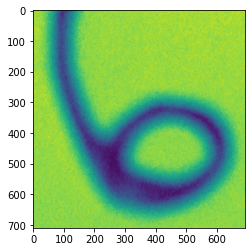

In [122]:
plt.imshow(p1)

In [123]:
p1_resize = cv2.resize(p1, (28,28))

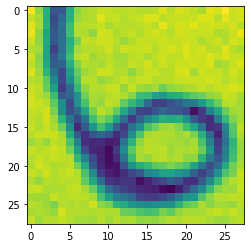

In [124]:
plt.imshow(p1_resize)

In [125]:
x_input = p1_resize/255.0

In [126]:
x_input

array([[0.68235294, 0.59607843, 0.47843137, 0.27058824, 0.27843137,
        0.4745098 , 0.58823529, 0.61960784, 0.62745098, 0.63921569,
        0.63921569, 0.63137255, 0.63137255, 0.63529412, 0.62352941,
        0.62352941, 0.63137255, 0.6627451 , 0.63137255, 0.65490196,
        0.64705882, 0.63529412, 0.61568627, 0.66666667, 0.65490196,
        0.69019608, 0.64705882, 0.65098039],
       [0.63921569, 0.61568627, 0.47843137, 0.24705882, 0.31764706,
        0.47843137, 0.60392157, 0.61960784, 0.62352941, 0.6627451 ,
        0.63529412, 0.64313725, 0.62352941, 0.63529412, 0.63921569,
        0.65882353, 0.65882353, 0.63137255, 0.64313725, 0.63921569,
        0.63921569, 0.64313725, 0.65882353, 0.65490196, 0.62745098,
        0.66666667, 0.63921569, 0.65098039],
       [0.6627451 , 0.61960784, 0.48235294, 0.25882353, 0.3372549 ,
        0.50980392, 0.62745098, 0.63137255, 0.63137255, 0.63921569,
        0.61568627, 0.63137255, 0.62745098, 0.62745098, 0.63137255,
        0.64313725, 0.6274

In [127]:

x_input = x_input.reshape(-1, 28,28,1)
y_pred = model.predict(x_input)

In [128]:
y_pred[0].argmax()

6